In [1]:
from sklearn.linear_model import LogisticRegression
import utils as utils
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [2]:
DATA_FILE_PATH = 'data.json'

In [3]:
train_tups, test_tups = utils.split_data(utils.generate_tuples_from_file(DATA_FILE_PATH, num_samples=10000), test_size=0.2)

print('Training set size: ', len(train_tups[0]))
print('Test set size: ', len(test_tups[0]))
print('Sample tokenized review: ', train_tups[0][0])
print('Sample rating: ', train_tups[1][0])

Training set size:  8000
Test set size:  2000
Sample tokenized review:  ['Good', 'price', 'and', 'hive', 'atmosphere', '.', 'Beignets', 'are', 'way', 'better', 'than', 'cafe', 'du', 'monde', ',', 'though', 'you', 'still', 'need', 'to', 'go', 'there', 'too', 'so', 'you', 'can', 'say', 'you', "'ve", 'been', 'there', '.', 'Great', 'mocha', 'and', 'brown', 'sugar', 'praline', 'cookie', 'here', 'too', '.', 'Nice', 'music', 'in', 'the', 'courtyard', '.', 'Check', 'it', 'out', '!']
Sample rating:  4


In [4]:
X_train_text = [' '.join(words) for words in train_tups[0]]


vectorizer = CountVectorizer(binary=True)
X_train_vectorized = vectorizer.fit_transform(X_train_text)

print(len(vectorizer.vocabulary_))

22248


In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, train_tups[1] )

test_review1 = ["the food was terrible"]
test_review2 = ["I loved my meal"]

vectorized_test_review1 = vectorizer.transform(test_review1)
vectorized_test_review2 = vectorizer.transform(test_review2)

prediction1 = model.predict(vectorized_test_review1)
prediction2 = model.predict(vectorized_test_review2)

print(prediction1)
print(prediction2)


[1]
[5]


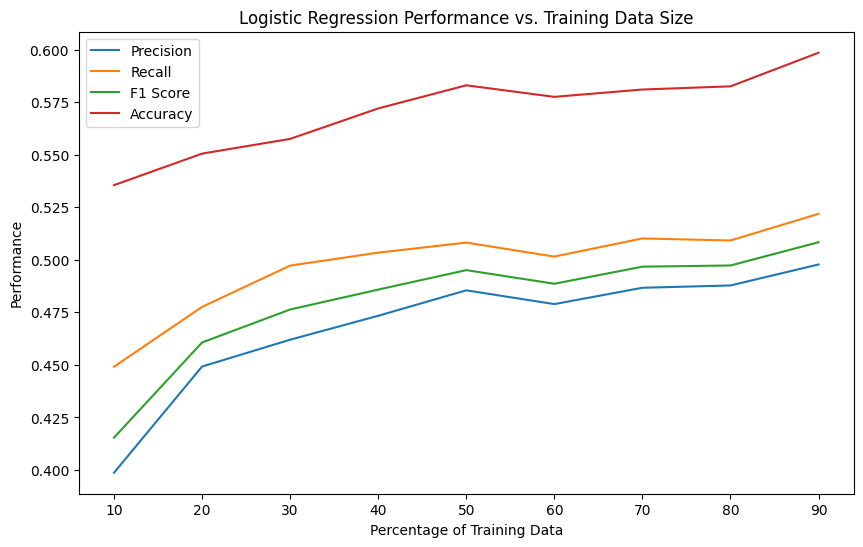

In [6]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)

# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis label

# USING COUNT VECTORIZER

train_sizes = []
accuracies = []
recalls = []
f1_scores = []
losses = []
precisions = []

total_samples = len(train_tups[0])
step_size = total_samples // 10

for i in range(1, 10):
    num_samples = step_size * i
    partial_train_data = train_tups[0][:num_samples]
    partial_train_labels = train_tups[1][:num_samples]

    vectorizer = CountVectorizer()
    X_train_text = [' '.join(words) for words in train_tups[0][:num_samples]] 
    X_train_vectorized = vectorizer.fit_transform(X_train_text).toarray()
    y_train = np.array(train_tups[1][:num_samples]).astype(np.float32)
    input_dim = X_train_vectorized.shape[1]

    model  = LogisticRegression(max_iter=1000)
    model.fit(X_train_vectorized, y_train)

    X_dev_text = [' '.join(words) for words in test_tups[0]]
    X_dev_vectorized = vectorizer.transform(X_dev_text).toarray().astype(np.float32)
    y_dev = np.array(test_tups[1]).astype(np.float32)

    X_dev_vectorized = np.pad(X_dev_vectorized, ((0, 0), (0, X_train_vectorized.shape[1] - X_dev_vectorized.shape[1])), 'constant')
    lr_preds = model.predict(X_dev_vectorized)

    accuracy = accuracy_score(lr_preds, y_dev )
    recall = recall_score(lr_preds, y_dev, average='macro')
    cur_f1_score = f1_score(lr_preds, y_dev, average='macro')
    precision = precision_score(lr_preds, y_dev, average='macro')

    train_sizes.append(i*10)
    accuracies.append(accuracy)
    f1_scores.append(cur_f1_score)
    recalls.append(recall)
    precisions.append(precision)



# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, precisions, label='Precision')
plt.plot(train_sizes, recalls, label='Recall')
plt.plot(train_sizes, f1_scores, label='F1 Score')
plt.plot(train_sizes, accuracies, label='Accuracy')

plt.title("Logistic Regression Performance vs. Training Data Size")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Performance")
plt.legend()

plt.savefig(f"logistic_regression.png")